In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

In [2]:
# 데이터 불러오기
df = pd.read_csv('Mall_Customers.csv')

In [3]:
# 데이터 확인
print(df)
print(df.info())
print(df.isna().sum())

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 column

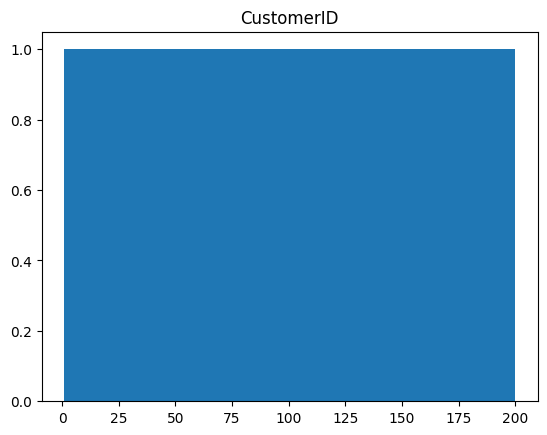

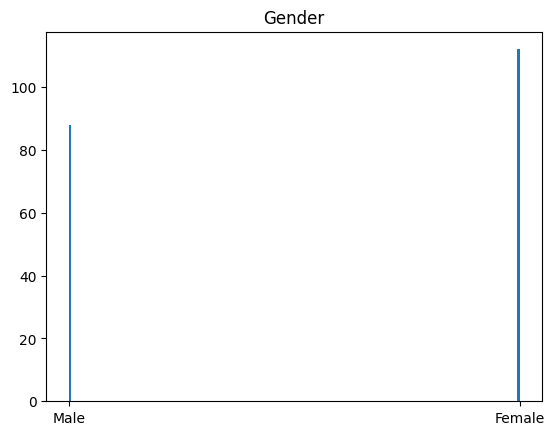

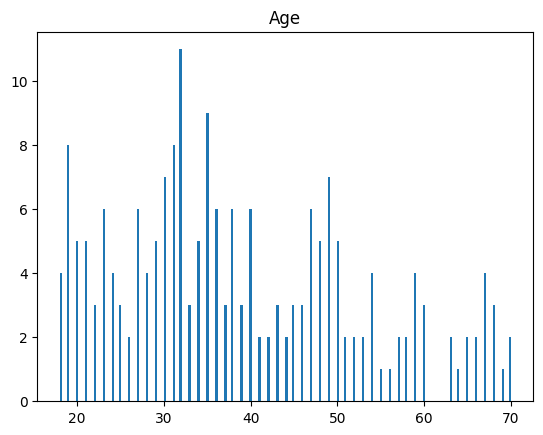

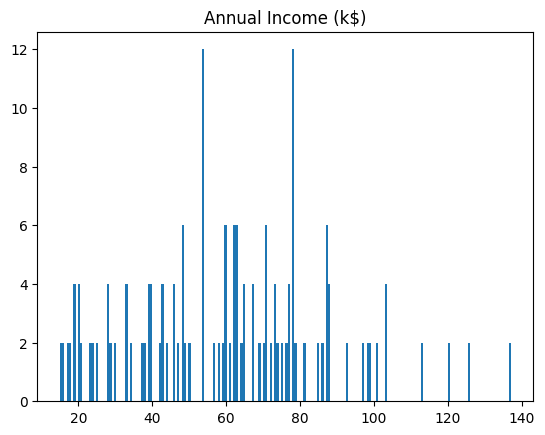

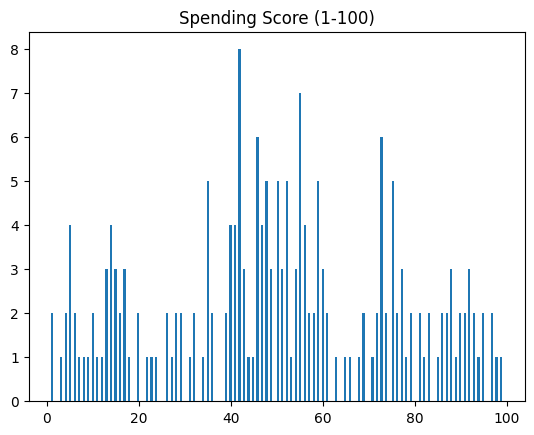

In [4]:
# 각 컬럼의 히스토그램 확인인
for i in df.columns:
    N = len(df[i])
    X = df[i]
    
    plt.hist(X,bins = N, label = i)
    plt.title(i)
    plt.show()

In [5]:
# 성별 원-핫 인코딩 진행
df = pd.get_dummies(df, columns=['Gender'], prefix = 'Gender', dtype = int)

In [6]:
# 데이터 확인
print(df)

     CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1   19                  15                      39   
1             2   21                  15                      81   
2             3   20                  16                       6   
3             4   23                  16                      77   
4             5   31                  17                      40   
..          ...  ...                 ...                     ...   
195         196   35                 120                      79   
196         197   45                 126                      28   
197         198   32                 126                      74   
198         199   32                 137                      18   
199         200   30                 137                      83   

     Gender_Female  Gender_Male  
0                0            1  
1                0            1  
2                1            0  
3                1            0  
4            

In [7]:
# CustomerId 제거 - 고유값으로 인식되어 제거, 성별은 범주형 변수로 인식되어 제거
df = df[['Age','Annual Income (k$)','Spending Score (1-100)']]

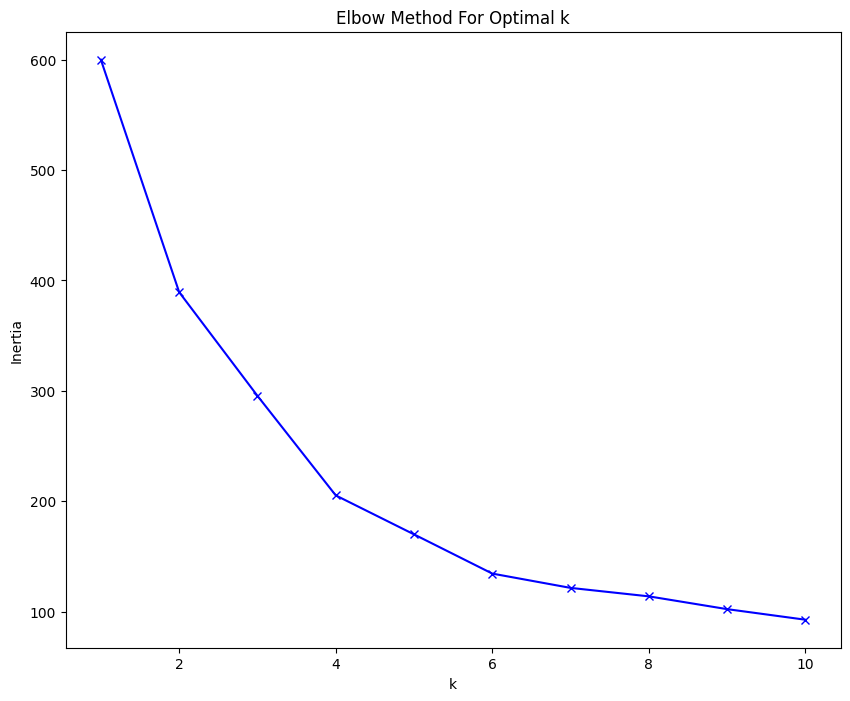

In [8]:
# 엘보우 방법을 통해 최적의 k 값 찾기
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

inertia = []
K = range(1,11)
for k in K:
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize = (10, 8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

kmeans = KMeans(n_clusters = 5, random_state = 42)
kmeans.fit(df_scaled)

df['cluster'] = kmeans.labels_

In [9]:
# 최적의 k 값을 6으로 설정하여 kmeans 모델 생성
kmeans = KMeans(n_clusters = 6, random_state = 42)
kmeans.fit(df_scaled)

KMeans(n_clusters=6, random_state=42)

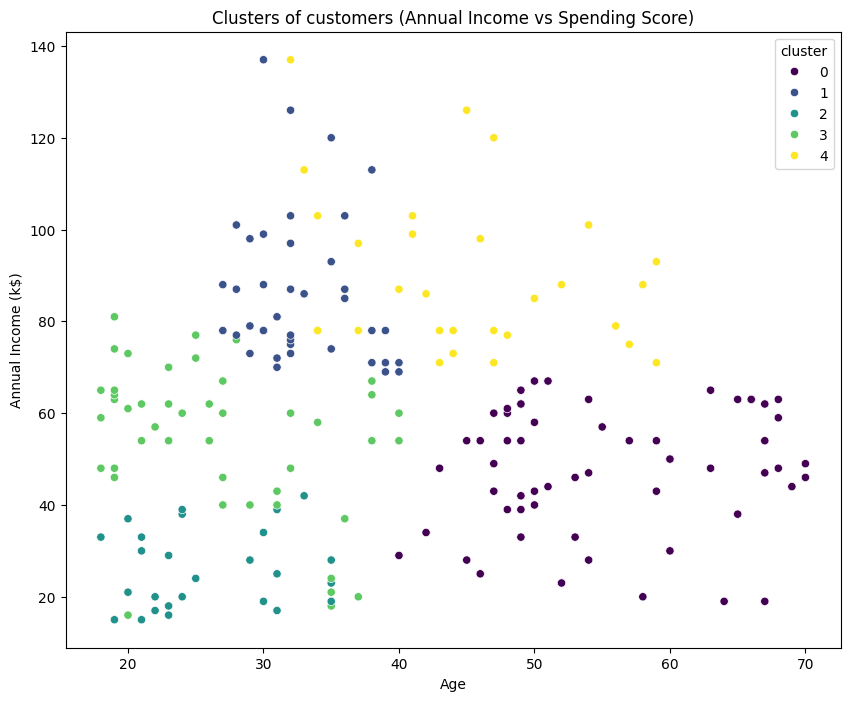

In [10]:
# 클러스터링의 결과 시각화(연령대 vs 연봉)
plt.figure(figsize=(10,8))
sns.scatterplot(x=df['Age'], y=df['Annual Income (k$)'], hue = df['cluster'], palette = 'viridis')
plt.title('Clusters of customers (Annual Income vs Spending Score)')
plt.show()

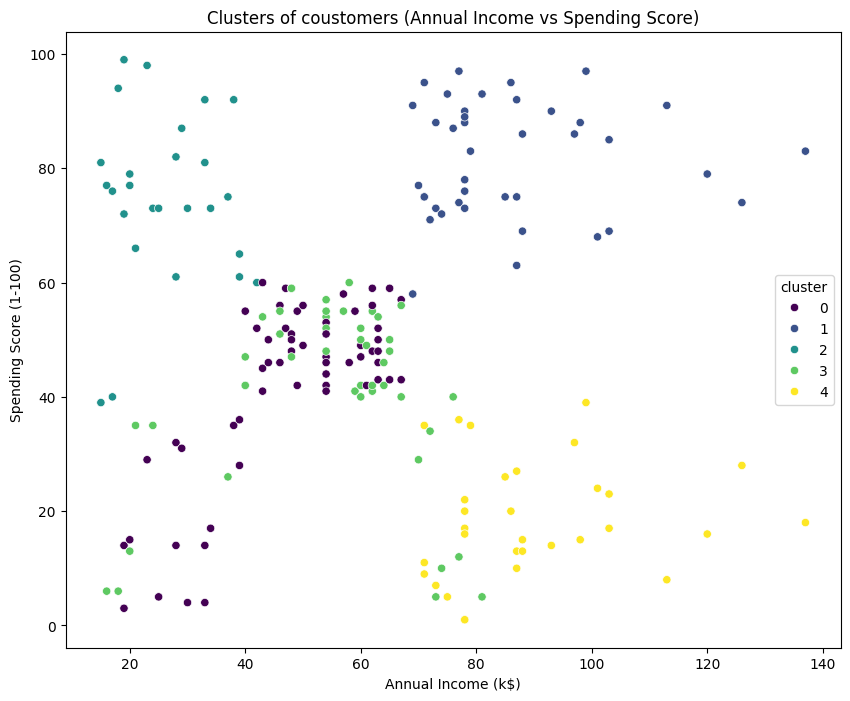

In [11]:
# 클러스터링의 결과 확인 (연봉 vs 소비점수)
plt.figure(figsize = (10,8))
sns.scatterplot(x=df['Annual Income (k$)'], y = df['Spending Score (1-100)'], hue = df['cluster'], palette = 'viridis')
plt.title('Clusters of coustomers (Annual Income vs Spending Score)')
plt.show()

In [12]:
# 실루엣 점수 평가
# k-means 군집화의 실루엣 계수 계산
print(f'Silhoette Score for kmeans : {silhouette_score(df_scaled, kmeans.labels_)}')

Silhoette Score for kmeans : 0.43106526216603014


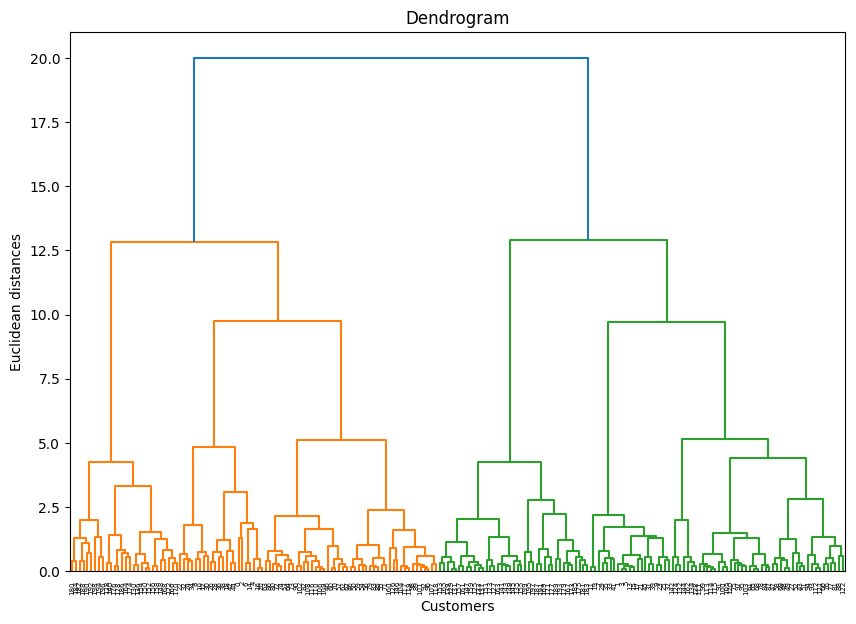

In [13]:
# 계층적 군집화의 덴드로그램 생성
plt.figure(figsize = (10, 7))
dendrogram = sch.dendrogram(sch.linkage(df_scaled, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

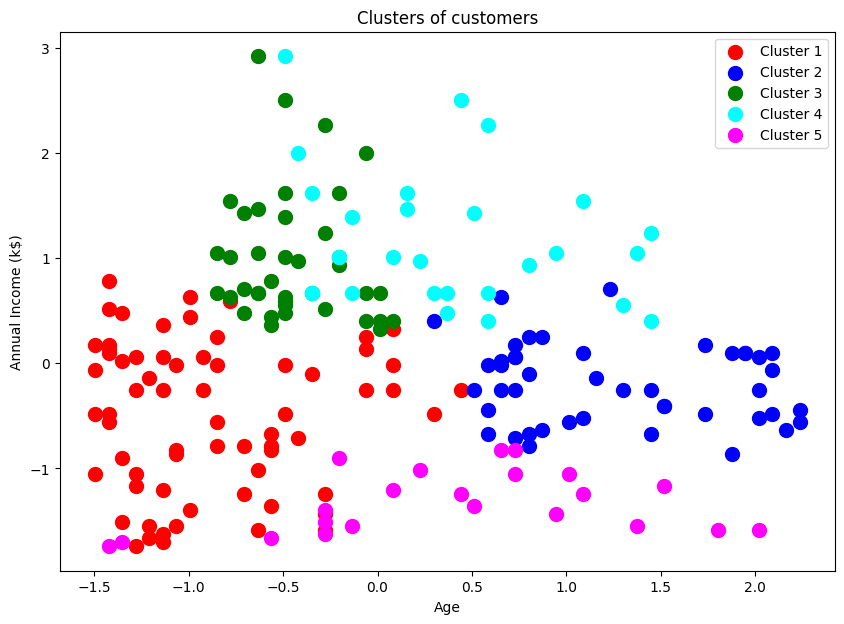

In [14]:
# 계층적 군집화 모델 생성
hc = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage = 'ward')

# 계층적 군집화 모델 적용
y_hc = hc.fit_predict(df_scaled)

# 계층적 군집화 결과 시각화 (나이 vs 연봉)
plt.figure(figsize = (10,7))
plt.scatter(df_scaled[y_hc == 0, 0], df_scaled[y_hc == 0, 1], s = 100,c = 'red', label = 'Cluster 1' )
plt.scatter(df_scaled[y_hc == 1, 0], df_scaled[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(df_scaled[y_hc == 2, 0], df_scaled[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(df_scaled[y_hc == 3, 0], df_scaled[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(df_scaled[y_hc == 4, 0], df_scaled[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend()
plt.show()

In [15]:
# 실루엣 계수를 통해 클러스터링 성능 평가


# 계층적 군집화의 실루엣 계수 계산
silhouette_avg = silhouette_score(df_scaled, y_hc)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.39002826186267214


In [16]:
# DBSCAN 군집화 모델 생성
from sklearn.cluster import DBSCAN

df = pd.read_csv('Mall_Customers.csv')

X= pd.get_dummies(df, columns = ['Gender'], prefix = 'Gender', dtype = int)
X = X.drop(columns = ['CustomerID'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

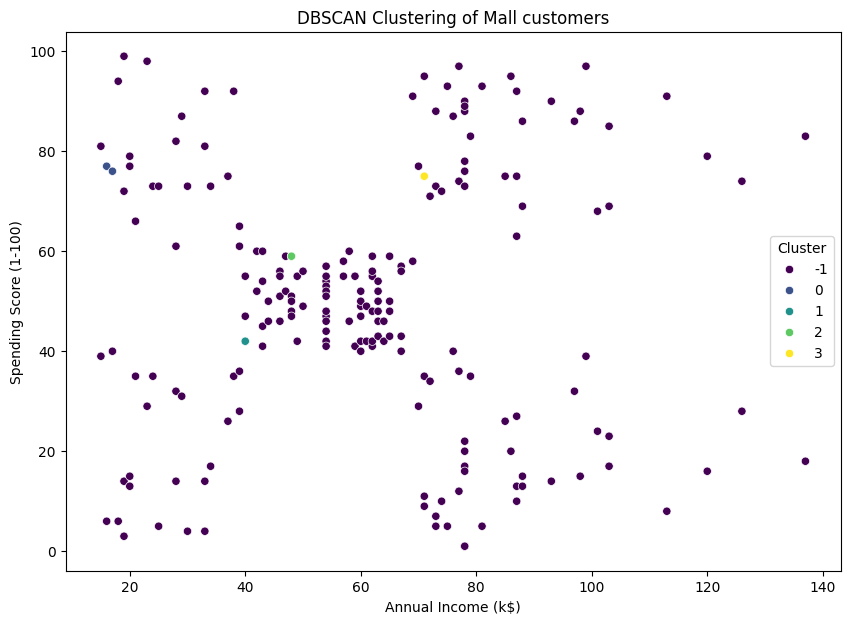

In [17]:
dbscan =DBSCAN(eps =2, min_samples = 2)
df['Cluster'] = dbscan.fit_predict(X)

plt.figure(figsize = (10,7))
sns.scatterplot(x ='Annual Income (k$)',y = 'Spending Score (1-100)', hue = 'Cluster',  data =df, palette = 'viridis')
plt.title('DBSCAN Clustering of Mall customers')
plt.show()

In [18]:
print(silhouette_score(X_scaled,dbscan.labels_))

-0.3668563383247796


In [19]:
# 다양한 eps와 min_samples 값 시도
eps_values = [3, 5, 7, 10]
min_samples_values = [3, 5, 7, 10]

for eps in eps_values:
    for min_samples in min_samples_values:
        # DBSCAN 모델 생성 및 학습
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        df['Cluster'] = dbscan.fit_predict(X)
        
        # 클러스터 수 확인
        n_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
        
        # 클러스터의 수가 2개 이상인 경우에만 실루엣 점수 계산
        # 실루엣 계산은 클러스터 간의 비교를 통해 계산되기 때문에 최소 2개 이상의 클러스터가 필요.
        if n_clusters >= 2:
            silhouette_avg = silhouette_score(X_scaled, dbscan.labels_)
            print(f'DBSCAN (eps={eps}, min_samples={min_samples}) - Silhouette Score: {silhouette_avg}')
        
        # plt.figure(figsize=(10, 7))
        # sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis')
        # plt.title(f'DBSCAN Clustering (eps={eps}, min_samples={min_samples})')
        # plt.show()

DBSCAN (eps=3, min_samples=3) - Silhouette Score: -0.23989735367348022
DBSCAN (eps=5, min_samples=3) - Silhouette Score: -0.35419920288863127
DBSCAN (eps=5, min_samples=5) - Silhouette Score: -0.2462908176761084
DBSCAN (eps=7, min_samples=3) - Silhouette Score: -0.22450308636685307
DBSCAN (eps=7, min_samples=5) - Silhouette Score: -0.1857397926411771
DBSCAN (eps=7, min_samples=7) - Silhouette Score: -0.20438401856132482
DBSCAN (eps=10, min_samples=3) - Silhouette Score: -0.0890179731402008
DBSCAN (eps=10, min_samples=5) - Silhouette Score: 0.016916293355600538
DBSCAN (eps=10, min_samples=7) - Silhouette Score: -0.00541322952100983
DBSCAN (eps=10, min_samples=10) - Silhouette Score: -0.10055222415260609


- DBSCAN 의 최적의 파라미터는 eps = 10, min_samples = 5이다

#### 결론
  - 실루엣 점수를 통한 클러스터링 성능 평가로 보았을 때, k-means 군집화가 가장 좋은 성능을 보였다.
  - 엘보우 방법을 통해 5, 6으로 설정하여 클러스터링을 진행한 결과, k를 6으로 설정하였을 때, 실루엣 점수가 더 높아 최적의 k 값은 6이라고 판단했다.


#### 도전 과제
##### 다양한 클러스터링 기법 비교

In [20]:
# Gaussian Mixture Model (GMM)
# GMM 모델 생성
gmm = GaussianMixture(
    n_components = 6, # 클러스터 수, 위 엘보우 방법을 통해 6으로 설정.
    covariance_type = 'full', # 공분산 행렬 타입 ('full', 'tied', 'diag', 'spherical' 중 선택)
    random_state = 42
)
lavels= gmm.fit_predict(X_scaled)

In [21]:
silhouette_avg = silhouette_score(X_scaled, lavels)
print(silhouette_avg)

0.30254073067167064


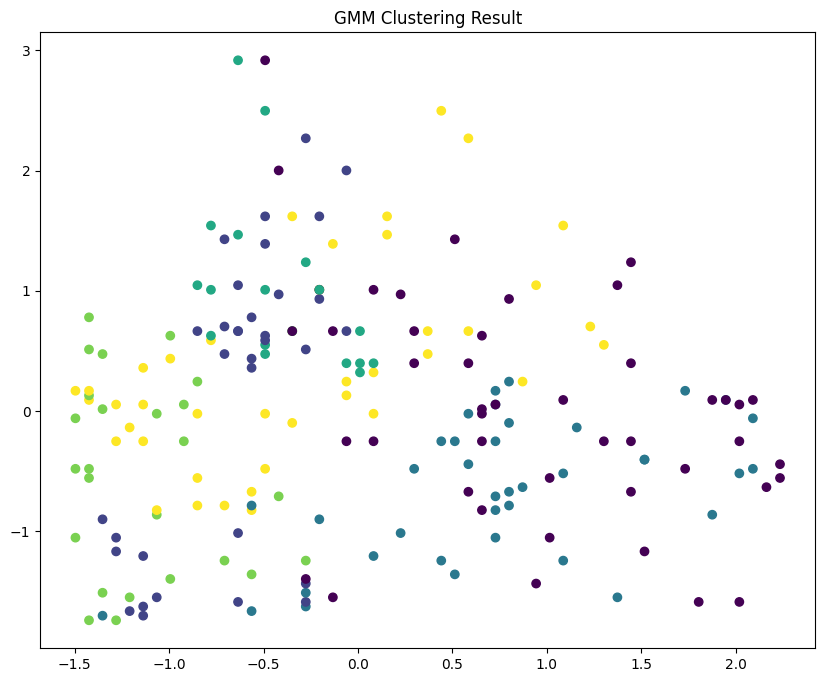

In [22]:
# 결과 시각화
plt.figure(figsize = (10, 8))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c = lavels, cmap = 'viridis')
plt.title('GMM Clustering Result')
plt.show() 

## 결론
  - GMM 모델의 성능은 covariace_type을 'spherical'로 설정하였을 때, 실루엣 점수 0.32로 가장 좋은 성능을 보인다. 그러나 일반적인 'full' 타입을 사용했을 때, 실루엣 점수는 0.3이 나온다
  - 총 네 개의 모델을 사용했을 때, k-means 클러스터링 모델이 가장 좋은 성능을 보여준다.